<a href="https://colab.research.google.com/github/Mayuri172-atole/dogs-vs-cats-transfer-learning/blob/main/TRANSFERL3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 800M/812M [00:04<00:00, 95.2MB/s]
100% 812M/812M [00:04<00:00, 207MB/s] 


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['dog.4212.jpg', 'dog.6388.jpg', 'cat.8792.jpg', 'cat.11490.jpg', 'cat.10945.jpg', 'cat.3355.jpg', 'cat.5598.jpg', 'cat.2453.jpg', 'dog.11965.jpg', 'dog.5007.jpg', 'dog.3396.jpg', 'cat.8351.jpg', 'cat.11306.jpg', 'cat.1485.jpg', 'cat.5990.jpg', 'dog.4638.jpg', 'dog.11418.jpg', 'dog.6988.jpg', 'cat.12456.jpg', 'cat.6340.jpg', 'cat.3808.jpg', 'cat.11947.jpg', 'dog.3656.jpg', 'cat.5258.jpg', 'dog.10629.jpg', 'dog.609.jpg', 'cat.2082.jpg', 'cat.8963.jpg', 'dog.4651.jpg', 'dog.11239.jpg', 'cat.9116.jpg', 'dog.12392.jpg', 'dog.12306.jpg', 'dog.2167.jpg', 'cat.7844.jpg', 'dog.1369.jpg', 'dog.11790.jpg', 'cat.1976.jpg', 'cat.5793.jpg', 'dog.8592.jpg', 'dog.11373.jpg', 'dog.4946.jpg', 'cat.5190.jpg', 'dog.4553.jpg', 'dog.12303.jpg', 'cat.2300.jpg', 'cat.7725.jpg', 'cat.41.jpg', 'dog.6315.jpg', 'cat.10082.jpg', 'cat.7420.jpg', 'cat.9023.jpg', 'dog.2728.jpg', 'dog.10615.jpg', 'dog.8804.jpg', 'cat.10944.jpg', 'cat.4940.jpg', 'cat.6872.jpg', 'cat.11936.jpg', 'dog.9490.jpg', 'cat.702.jpg', 'dog.2190

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

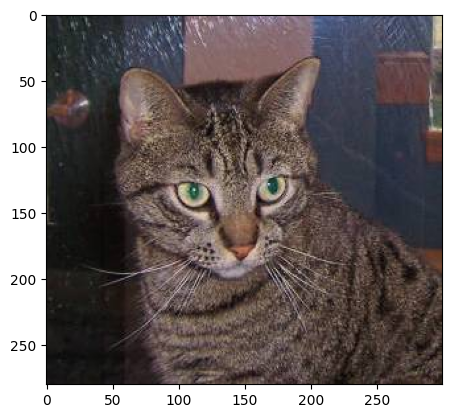

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/train/cat.1.jpg')
imgplot = plt.imshow(img)
plt.show()

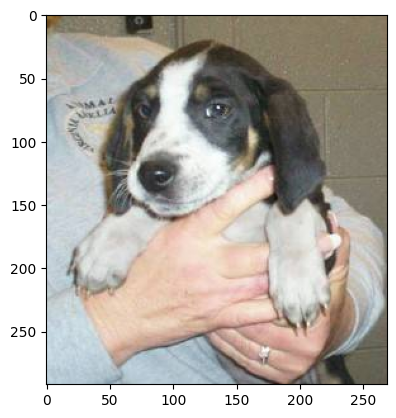

In [ ]:
img = mpimg.imread('/content/train/dog.10.jpg')
imgplot = plt.imshow(img)
plt.show()

EDA DATA

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



dog
dog
cat
cat
cat


In [ ]:
file_names=os.listdir('/content/train/')
dog_count=0
cat_count=0
for i in range(len(file_names)):
  name=file_names[i]
  if name[0:3]=='dog':
    dog_count+=1
  else:
    cat_count+=1

print('Number of dogs: ', dog_count)
print('Number of cats: ', cat_count)

Number of dogs:  12500
Number of cats:  12500


In [ ]:
os.mkdir('/content/dataset')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

import os
from PIL import Image

# Create the resized_folder if it doesn't exist
if not os.path.exists(resized_folder):
    os.makedirs(resized_folder)

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

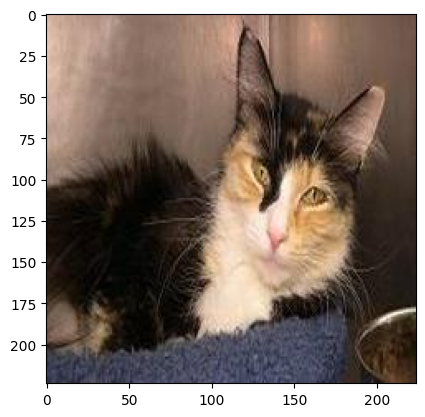

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/cat.10012.jpg')
imgplt = plt.imshow(img)
plt.show()

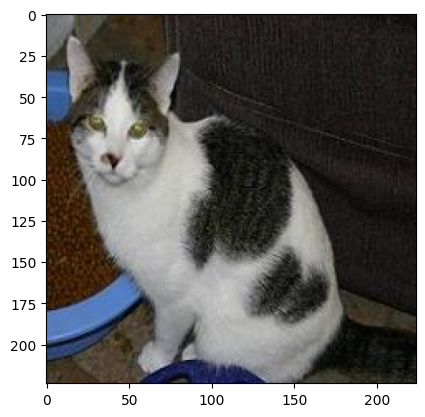

In [ ]:
 # display resized cat image
img = mpimg.imread('/content/image resized/cat.95.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized/')


labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['dog.4212.jpg', 'dog.6388.jpg', 'cat.8792.jpg', 'cat.11490.jpg', 'cat.10945.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[1, 1, 0, 0, 0]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
import numpy as np
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[ 985 1015]


In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[106 106  94]
   [108 108  96]
   [114 114 102]
   ...
   [ 97 100  91]
   [104 107  98]
   [114 117 108]]

  [[108 108  96]
   [104 106  94]
   [107 107  95]
   ...
   [ 95  98  89]
   [100 103  94]
   [108 111 102]]

  [[109 111  99]
   [101 105  93]
   [100 102  90]
   ...
   [102 105  96]
   [104 107  98]
   [108 111 102]]

  ...

  [[104 107 112]
   [104 107 112]
   [114 117 122]
   ...
   [112 123 113]
   [105 116 108]
   [109 123 112]]

  [[108 110 118]
   [103 105 113]
   [110 112 120]
   ...
   [109 122 114]
   [100 112 106]
   [102 117 109]]

  [[116 118 126]
   [106 108 116]
   [109 111 119]
   ...
   [106 118 112]
   [ 88 102  96]
   [ 84  98  92]]]


 [[[ 76 124 130]
   [ 60 110 116]
   [ 25  81  86]
   ...
   [ 81 115 121]
   [124 160 168]
   [ 59  96 104]]

  [[ 72 119 127]
   [ 47  99 105]
   [ 25  81  86]
   ...
   [ 32  64  70]
   [ 77 113 119]
   [ 95 133 138]]

  [[ 74 123 133]
   [ 68 120 127]
   [ 54 109 116]
   ...
   [  9  41  46]
   [ 26  61  65]
   [ 62  99

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.38823529 0.48627451 0.49411765]
   [0.39607843 0.49803922 0.49803922]
   [0.39215686 0.49803922 0.48627451]
   ...
   [0.67843137 0.79607843 0.68235294]
   [0.67843137 0.79607843 0.68235294]
   [0.67843137 0.79607843 0.68235294]]

  [[0.36862745 0.47058824 0.47058824]
   [0.38823529 0.49803922 0.49803922]
   [0.40784314 0.51372549 0.49803922]
   ...
   [0.68627451 0.80392157 0.69019608]
   [0.68627451 0.80392157 0.69019608]
   [0.68627451 0.80392157 0.69019608]]

  [[0.36470588 0.47843137 0.46666667]
   [0.38431373 0.50980392 0.49019608]
   [0.40392157 0.52156863 0.50196078]
   ...
   [0.68235294 0.80784314 0.68627451]
   [0.68627451 0.80784314 0.68627451]
   [0.68627451 0.80784314 0.68627451]]

  ...

  [[0.48627451 0.64705882 0.54117647]
   [0.48627451 0.64705882 0.54117647]
   [0.48627451 0.64705882 0.54117647]
   ...
   [0.15294118 0.34901961 0.55686275]
   [0.16078431 0.35686275 0.56470588]
   [0.16862745 0.36470588 0.57254902]]

  [[0.49411765 0.65490196 0.54901961]
   [0.4

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Load pretrained MobileNetV2 model (excluding top classifier layers)
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

# Freeze the base model
base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:

# Add custom classifier on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Reduce spatial dimensions
    layers.Dense(2, activation='softmax')  # Binary classification (2 classes)
])


model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,260,546 (8.62 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.8100 - loss: 0.4022
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9731 - loss: 0.0906
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9797 - loss: 0.0652
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9876 - loss: 0.0507
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9865 - loss: 0.0396


In [ ]:
model.save('my_model.h5')

In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test score:', score)
print('Test accuracy:', acc)

/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 266ms/step - accuracy: 0.9649 - loss: 0.0623
Test score: 0.051067229360342026
Test accuracy: 0.9750000238418579


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

import cv2
from google.colab.patches import cv2_imshow
import numpy as np


input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')